## Solving the linear regression problem with gradient descent

Today we rewise the linear regression algorithm and it's gradient solution.

Your main goal will be to __derive and implement the gradient of MSE, MAE, L1 and L2 regularization terms__ respectively in general __vector form__ (when both single observation $\mathbf{x}_i$ and corresponding target value $\mathbf{y}_i$ are vectors).

This techniques will be useful later in Deep Learning module of out course as well.

We will work with [Boston housing prices dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html), subset, which was preprocessed for your convenience.

In [1]:
import torch
# Run some setup code for this notebook.
import random
import numpy as np
import matplotlib.pyplot as plt

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import json
with open('boston_subset.json', 'r') as iofile:
    dataset = json.load(iofile)
feature_matrix = np.array(dataset['data'])
targets = np.array(dataset['target'])

Autoreload is a great stuff, but sometimes it does not work as intended. The code below aims to fix than. __Do not forget to save your changes in the `.py` file before reloading the desired functions.__

## Warming up: matrix differentiation
_You will meet this questions later in Labs as well, so we highly recommend to answer to them right here._

Since it easy to google every task please please please try to undestand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. It is absolutely OK if you found an answer on web then just exercise in $\LaTeX$ copying it into here.

Useful links: 
[1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)
[2](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)
[3](http://cal.cs.illinois.edu/~johannes/research/matrix%20calculus.pdf)
[4](http://research.microsoft.com/en-us/um/people/cmbishop/prml/index.htm)

#### Inline question 1
$$  
y = x^Tx,  \quad x \in \mathbb{R}^N 
$$

$$
\frac{dy}{dx} = 
$$ 

#### Inline question 2
$$ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $$ 

$$
\frac{dy}{dA} =
$$

#### Inline question 3
$$  
y = x^TAc , \quad A\in \mathbb{R}^{N \times N}, x\in \mathbb{R}^{N}, c\in \mathbb{R}^{N} 
$$

$$
\frac{dy}{dx} =
$$

$$
\frac{dy}{dA} =
$$

Hint for the latter (one of the ways): use *ex. 2* result and the fact 
$$
tr(ABC) = tr (CAB)
$$

## Loss functions and derivetives implementation
You will need to implement the methods from `loss_and_derivatives.py` to go further.
__In this assignment we ignore the bias term__, so the linear model takes simple form of 
$$
\hat{\mathbf{y}} = XW
$$

Implement the loss functions, regularization terms and their derivatives w.r.t weighs matrix. 

_Once again, you can assume that linar model does not need bias term for now. The dataset is preprocessed for this case._

In [39]:
# This dirty hack might help if the autoreload has failed for some reason
try:
    del LossAndDerivatives
except:
    pass

from loss_and_derivatives import LossAndDerivatives

In [40]:
w = np.array([1., 1.])
x_n, y_n = feature_matrix, targets

Here come several asserts to check yourself:

In [41]:
w = np.array([1., 1.])
x_n, y_n = feature_matrix, targets

w = np.vstack([w[None, :] + 0.27, w[None, :] + 0.22, w[None, :] + 0.45, w[None, :] + 0.1]).T
y_n = np.hstack([y_n[:, None], 2*y_n[:, None], 3*y_n[:, None], 4*y_n[:, None]])

x_t = torch.tensor(x_n)
y_t = torch.tensor(y_n)
w_t = torch.tensor(w, requires_grad=True) #torch.ones((2), dtype=torch.float64, requires_grad=True) + 0.27

assert np.array_equal(w_t.detach().numpy(), w)

In [59]:
# MSE + L2
reg_coeff = 0.05
loss1 = torch.mean((torch.matmul(x_t, w_t) - y_t)**2)
loss1.backward()
assert(np.allclose(w_t.grad.data.numpy(), LossAndDerivatives.mse_derivative(x_n, y_n, w), rtol=1e-3))

print(w_t.grad.data.numpy())
w_t.grad.data.zero_()
print()

loss2 = reg_coeff * torch.sum(w_t**2)
loss2.backward()
print(w_t.grad.data.numpy())
w_t.grad.data.zero_()
print((loss1 + loss2).item())
print()
print()

loss_n = np.mean((x_n.dot(w) - y_n)**2) + reg_coeff * np.sum(w**2)
print(loss_n, '\n', LossAndDerivatives.mse_derivative(x_n, y_n, w), '\n\n', reg_coeff * LossAndDerivatives.l2_reg_derivative(w), '\n\n')

[[ 7.32890068 12.88731311 18.82128365 23.97731238]
 [ 9.55674399 17.05397661 24.98807528 32.01723714]]

[[0.127 0.122 0.145 0.11 ]
 [0.127 0.122 0.145 0.11 ]]
1468.7594312537688


1468.7594312537685 
 [[ 7.32890068 12.88731311 18.82128365 23.97731238]
 [ 9.55674399 17.05397661 24.98807528 32.01723714]] 

 [[0.127 0.122 0.145 0.11 ]
 [0.127 0.122 0.145 0.11 ]] 




In [60]:
# MSE + L1
reg_coeff = 0.05
loss1 = torch.mean((torch.matmul(x_t, w_t) - y_t)**2)
loss1.backward()
print(w_t.grad.data.numpy())
# assert(np.allclose(w_t.grad.data.numpy(), LossAndDerivatives.mse_derivative(x_n, y_n, w), rtol=1e-3))

w_t.grad.data.zero_()
print()
print()

loss2 = reg_coeff * torch.sum(torch.abs(w_t))
loss2.backward()
print(w_t.grad.data.numpy())
# assert(np.allclose(w_t.grad.data.numpy(), LossAndDerivatives.l1_reg_derivative(w), rtol=1e-3))

w_t.grad.data.zero_()
print((loss1 + loss2).item())
print()
print()

loss_n = np.mean(np.abs((x_n.dot(w) - y_n))) + reg_coeff * np.sum(np.abs(w))
print(loss_n, '\n', LossAndDerivatives.mse_derivative(x_n, y_n, w), '\n\n', reg_coeff * LossAndDerivatives.l1_reg_derivative(w), '\n\n')

[[ 7.32890068 12.88731311 18.82128365 23.97731238]
 [ 9.55674399 17.05397661 24.98807528 32.01723714]]


[[0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05]]
1468.6220512537686


32.12463606879173 
 [[ 7.32890068 12.88731311 18.82128365 23.97731238]
 [ 9.55674399 17.05397661 24.98807528 32.01723714]] 

 [[0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05]] 




In [61]:
# MAE + L2
reg_coeff = 0.05
loss1 = torch.mean(torch.abs(torch.matmul(x_t, w_t) - y_t))
loss1.backward()
assert(np.allclose(w_t.grad.data.numpy(), LossAndDerivatives.mae_derivative(x_n, y_n, w), rtol=1e-3))

print(w_t.grad.data.numpy())
w_t.grad.data.zero_()
print()

loss2 = reg_coeff * torch.sum(w_t**2)
loss2.backward()
print(w_t.grad.data.numpy())
w_t.grad.data.zero_()
print((loss1 + loss2).item())
print()
print()

loss_n = np.mean(np.abs((x_n.dot(w) - y_n))) + reg_coeff * np.sum(w**2)
print(loss_n, '\n', LossAndDerivatives.mae_derivative(x_n, y_n, w), '\n\n', reg_coeff * LossAndDerivatives.l2_reg_derivative(w), '\n\n')

[[0.19708867 0.19621798 0.19621798 0.19572906]
 [0.25574138 0.25524507 0.25524507 0.25406404]]

[[0.127 0.122 0.145 0.11 ]
 [0.127 0.122 0.145 0.11 ]]
32.26201606879173


32.26201606879173 
 [[0.19708867 0.19621798 0.19621798 0.19572906]
 [0.25574138 0.25524507 0.25524507 0.25406404]] 

 [[0.127 0.122 0.145 0.11 ]
 [0.127 0.122 0.145 0.11 ]] 




In [62]:
# MAE + L1
reg_coeff = 0.05
loss1 = torch.mean(torch.abs(torch.matmul(x_t, w_t) - y_t))
loss1.backward()
assert(np.allclose(w_t.grad.data.numpy(), LossAndDerivatives.mae_derivative(x_n, y_n, w), rtol=1e-3))

print(w_t.grad.data.numpy())
w_t.grad.data.zero_()
print()

loss2 = reg_coeff * torch.sum(torch.abs(w_t))
loss2.backward()
print(w_t.grad.data.numpy())
w_t.grad.data.zero_()
print((loss1 + loss2).item())
print()
print()

loss_n = np.mean(np.abs((x_n.dot(w) - y_n))) + reg_coeff * np.sum(np.abs(w))
print(loss_n, '\n', LossAndDerivatives.mae_derivative(x_n, y_n, w), '\n\n', reg_coeff * LossAndDerivatives.l1_reg_derivative(w), '\n\n')

[[0.19708867 0.19621798 0.19621798 0.19572906]
 [0.25574138 0.25524507 0.25524507 0.25406404]]

[[0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05]]
32.12463606879173


32.12463606879173 
 [[0.19708867 0.19621798 0.19621798 0.19572906]
 [0.25574138 0.25524507 0.25524507 0.25406404]] 

 [[0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05]] 




Here comes small loop with gradient descent algorithm. We compute the gradient over the whole dataset.

In [63]:
def get_w_by_grad(X, Y, w_0, loss_mode='mse', reg_mode=None, lr=0.05, n_steps=100, reg_coeff=0.05):
    if loss_mode == 'mse':
        loss_function = LossAndDerivatives.mse
        loss_derivative = LossAndDerivatives.mse_derivative
    elif loss_mode == 'mae':
        loss_function = LossAndDerivatives.mae
        loss_derivative = LossAndDerivatives.mae_derivative
    else:
        raise ValueError('Unknown loss function. Available loss functions: `mse`, `mae`')
    
    if reg_mode is None:
        reg_function = LossAndDerivatives.no_reg
        reg_derivative = LossAndDerivatives.no_reg_derivative # lambda w: np.zeros_like(w)
    elif reg_mode == 'l2':
        reg_function = LossAndDerivatives.l2_reg
        reg_derivative = LossAndDerivatives.l2_reg_derivative
    elif reg_mode == 'l1':
        reg_function = LossAndDerivatives.l1_reg
        reg_derivative = LossAndDerivatives.l1_reg_derivative
    else:
        raise ValueError('Unknown regularization mode. Avaliable modes: `l1`, `l2`, None')
    
    
    w = w_0.copy()

    for i in range(n_steps):
        empirical_risk = loss_function(X, Y, w) + reg_coeff * reg_function(w)
        gradient = loss_derivative(X, Y, w) + reg_coeff * reg_derivative(w)
        gradient_norm = np.linalg.norm(gradient)
        if gradient_norm > 5.:
            gradient = gradient / gradient_norm * 5.
        w -= lr * gradient
        
        if i % 5 == 0:
            print('Step={}, loss={}, gradient values={}\n'.format(i, empirical_risk, gradient))
    return w


In [64]:
# Initial weights matrix
w = np.ones((2,2), dtype=float)
y_n = np.hstack([targets[:, None], targets[:, None]])

In [65]:
w_grad = get_w_by_grad(x_n, y_n, w, lr=0.05, loss_mode='mse', reg_mode='l1', reg_coeff=0.25)

Step=0, loss=[[231.43353985 231.43353985]
 [231.43353985 231.43353985]], gradient values=[[2.14961307 2.14961307]
 [2.8069848  2.8069848 ]]

Step=5, loss=[[192.95517061 192.95517061]
 [192.91338737 192.91338737]], gradient values=[[2.1330249  2.1330249 ]
 [2.81961075 2.81961075]]

Step=10, loss=[[159.06234987 159.06234987]
 [159.1459271  159.1459271 ]], gradient values=[[2.09499104 2.09499104]
 [2.84798394 2.84798394]]

Step=15, loss=[[129.93842131 129.93842131]
 [130.0703677  130.0703677 ]], gradient values=[[2.0627539  2.0627539 ]
 [2.87141888 2.87141888]]

Step=20, loss=[[105.34654361 105.34654361]
 [105.53083265 105.53083265]], gradient values=[[2.0172614  2.0172614 ]
 [2.90355927 2.90355927]]

Step=25, loss=[[85.27441044 85.27441044]
 [85.51673558 85.51673558]], gradient values=[[1.94816657 1.94816657]
 [2.95036388 2.95036388]]

Step=30, loss=[[69.69950859 69.69950859]
 [70.00872404 70.00872404]], gradient values=[[1.83071991 1.83071991]
 [3.02464289 3.02464289]]

Step=35, loss=[[

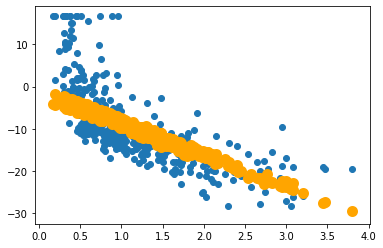

In [66]:
plt.scatter(x_n[:, -1], y_n[:, -1])
plt.scatter(x_n[:, -1], x_n.dot(w_grad)[:, -1], color='orange', linewidth=5)
plt.show()

### Submitting your work
To submit your work you need to log into Yandex contest (link will be provided later) and upload the `loss_and_derivatives.py` file for the corresponding problem